##### Imports

In [3]:
import sys, os
from asvFormula.digraph import *
from asvFormula.classesSizes.algorithmTime import *

from importlib import reload 
import asvFormula
import asvFormula.topoSorts.topoSortsCalc as tp
import asvFormula.topoSorts.toposPositions as pos
import asvFormula.testingFunctions as tst


tp = reload(asvFormula.topoSorts.topoSortsCalc)
pos = reload(asvFormula.topoSorts.toposPositions)
tst = reload(asvFormula.testingFunctions)

#### Debuggin utils

In [4]:
import itertools

parentNodes = ['11', '21', '30']

def classifyNodesByOrderAndIndexes(parentNodes):
    allTopos = list(nx.all_topological_sorts(union))
    copyUnion = union.copy()

    #This is to identify each node with it's tree
    tp.removeMultipleParents(copyUnion)
    roots = [node for node in copyUnion.nodes() if isRoot(node, copyUnion)]
    for root in roots: 
        tp.addRootInfo(root, copyUnion)
    treePerNode = {node: copyUnion.nodes[node]['root'] for node in copyUnion.nodes()}

    permutations = list(itertools.permutations(parentNodes))
    toposPermutations = {}

    for topo in allTopos:
        for perm in permutations:
            indexes = [topo.index(node) for node in perm]
            if  indexes == sorted(indexes):
                nodesPerTree = {tree: [node for node in topo if treePerNode[node] == tree] for tree in set(treePerNode.values())}
                permIndexInTree = [nodesPerTree[treePerNode[node]].index(node) for node in perm]
                key = f'Permutation: {perm}, Indexes: {permIndexInTree}'
                toposPermutations[key] = toposPermutations.get(key, 0) + 1

    return toposPermutations

# This can be used to check if mergeConnectedTrees is working correctly

def pathToLeaf(tree : nx.DiGraph, start_node):
    path = [start_node]
    current = start_node
    while not isLeaf(current, tree):
        current = next(tree.successors(current))
        path.append(current)
    return path

## Positions of node in toposorts of tree


In [5]:
numLevels = 3
branchingFactor = 3

treeTest = balancedTree(numLevels, branchingFactor)

middleTree = pathToLeaf(treeTest, 0)
#allTopos = list(nx.all_topological_sorts(treeTest))
#tst.test_allToposPositions(middleTree, treeTest, allTopos)

# It takes 8 minutes to run. Most of the time is spent calculating all the topological sorts and iterating over them

## Toposorts of a polytree


### Polytree with one intersection


#### Leafs to root


In [6]:
numLevels = 2
branchingFactor = 3

leftTree = balancedTree(numLevels, branchingFactor)
rigthTree = balancedTree(numLevels, branchingFactor)
middleTree = balancedTree(numLevels, branchingFactor)

union = nx.union(leftTree, rigthTree, rename=('1-', '2-'))
union = nx.union(union, middleTree, rename=('', '3-'))

#Connect the trees to the middle one
union.add_edge('1-2', '3-0')
union.add_edge('2-1', '3-0')
#drawGraph(union)
tst.test_allPolyTopos(union)


#### Roots to leaf


In [7]:
numLevels = 4
branchingFactor = 1

leftTree = balancedTree(numLevels, branchingFactor)
rigthTree = balancedTree(numLevels, branchingFactor)
middleTree = balancedTree(numLevels, branchingFactor)

union = nx.union(leftTree, rigthTree, rename=('1-', '2-'))
union = nx.union(union, middleTree, rename=('', '3-'))

#Connect the trees to the middle one
union.add_edge('1-2', '3-3')
union.add_edge('2-2', '3-3')
#drawGraph(union)
tst.test_allPolyTopos(union)


#### Nodes to nodes


In [8]:
numLevels = 4
branchingFactor = 1

leftTree = balancedTree(numLevels, branchingFactor)
rigthTree = balancedTree(numLevels, branchingFactor)
middleTree = balancedTree(numLevels, branchingFactor)

union = nx.union(leftTree, rigthTree, rename=('1-', '2-'))
union = nx.union(union, middleTree, rename=('', '3-'))

#Connect the trees to the middle one
union.add_edge('1-2', '3-2')
union.add_edge('2-2', '3-2')
#drawGraph(union)
tst.test_allPolyTopos(union)


#### Intersection with more than 2 parents


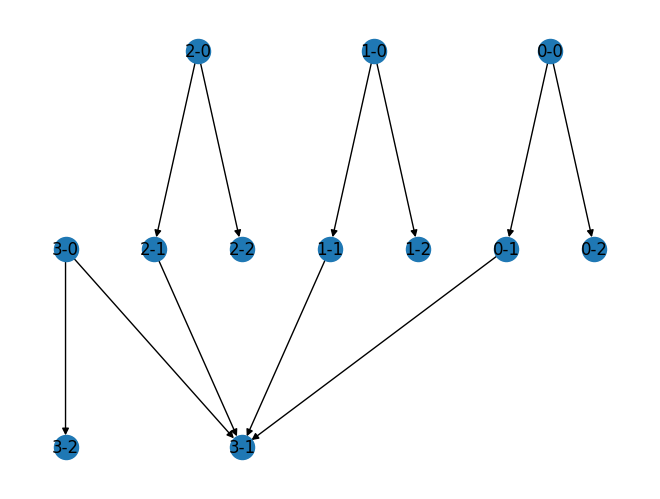

In [19]:
numLevels = 2
branchingFactor = 2
parents = 4

union = nx.DiGraph()
for i in range(parents):
    tree = balancedTree(numLevels, branchingFactor)
    union = nx.union(tree, union, rename=(f'{i}-', ''))

for i in range(parents-1):
    union.add_edge(f'{i}-1', f'{parents-1}-1')
drawGraph(union)
#tst.test_allPolyTopos(union)

#It takes 28 seconds to run. Most of the time is spent calculating all the topological sorts and iterating over them


### Polytree with two intersections


#### Nodes to nodes


In [9]:
numLevels = 4
branchingFactor = 1

leftTree = balancedTree(numLevels, branchingFactor)
rigthTree = balancedTree(numLevels, branchingFactor)
middleTree = balancedTree(numLevels, branchingFactor)

union = nx.union(leftTree, rigthTree, rename=('1-', '2-'))
union = nx.union(union, middleTree, rename=('', '3-'))

#Connect the trees to the middle one
union.add_edge('1-2', '3-2')
union.add_edge('2-2', '3-2')
#drawGraph(union)
tst.test_allPolyTopos(union)
